<a href="https://colab.research.google.com/github/hariomvyas/Stance-Detection/blob/main/TweetStanceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset Information

Favourable or Unfavourable towards one of five targets
- Atheism
- Climate Change is a real Concern
- Feminist Movement
- Hillary Clinton
- Legalization of Abortion

It conveys whether it is Postivie, Negative or Neutral

Stance Detection System
- F-Score : 70.3
- Model : Linear-kernel SVM Classifier 

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns

from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

sns.set(rc={'figure.figsize':(15,10)})

In [ ]:
# read text file into pandas DataFrame
taskA_df = pd.read_csv("/content/testdata-taskA-all-annotations.txt", sep="\t", on_bad_lines='skip')
  
# display DataFrame
taskA_df

,ID,Target,Tweet,Stance,Opinion towards,Sentiment
0,10001,Atheism,He who exalts himself shall be humbled; a...,AGAINST,TARGET,POSITIVE
1,10002,Atheism,RT @prayerbullets: I remove Nehushtan -previou...,AGAINST,TARGET,NEITHER
2,10003,Atheism,@Brainman365 @heidtjj @BenjaminLives I have so...,AGAINST,TARGET,POSITIVE
3,10004,Atheism,#God is utterly powerless without Human interv...,AGAINST,TARGET,NEGATIVE
4,10005,Atheism,@David_Cameron Miracles of #Multiculturalism...,AGAINST,OTHER,NEGATIVE
...,...,...,...,...,...,...
1244,11245,Legalization of Abortion,@MetalheadMonty @tom_six I followed him before...,NONE,OTHER,NEGATIVE
1245,11246,Legalization of Abortion,"For he who avenges blood remembers, he does no...",AGAINST,TARGET,NEITHER
1246,11247,Legalization of Abortion,Life is sacred on all levels. Abortion does no...,AGAINST,TARGET,NEITHER
1247,11248,Legalization of Abortion,"@ravensymone U refer to ""WE"" which =""YOU"" & a ...",AGAINST,TARGET,NEGATIVE


In [ ]:
# read text file into pandas DataFrame
taskAids_df = pd.read_csv("/content/testdata-taskA-ids.txt", sep="\t")
  
# display DataFrame
taskAids_df

,ID,Tweet ID
0,10001,617215483176222720
1,10002,617216836908625920
2,10003,617236542826778624
3,10004,617266381604655105
4,10005,617270731265540096
...,...,...
1244,11245,619839536240181248
1245,11246,619847404850954240
1246,11247,619860185792794624
1247,11248,619861980762009600


In [ ]:
# read text file into pandas DataFrame
taskB_df = pd.read_csv("/content/testdata-taskB-all-annotations.txt", sep="\t", on_bad_lines='skip')

# display DataFrame
taskB_df

,ID,Target,Tweet,Stance,Opinion towards,Sentiment
0,20001,Donald Trump,@2014voteblue @ChrisJZullo blindly supporting ...,NONE,OTHER,NEGATIVE
1,20002,Donald Trump,@ThePimpernelX @Cameron_Gray @CalebHowe Total...,NONE,OTHER,POSITIVE
2,20003,Donald Trump,@JeffYoung @ThePatriot143 I fully support full...,NONE,OTHER,POSITIVE
3,20004,Donald Trump,@ABC Stupid is as stupid does! Showedhis true ...,AGAINST,TARGET,NEGATIVE
4,20005,Donald Trump,@HouseGOP we now have one political party. The...,NONE,OTHER,NEGATIVE
...,...,...,...,...,...,...
702,20703,Donald Trump,@realDonaldTrump we all want you as the next p...,FAVOR,TARGET,POSITIVE
703,20704,Donald Trump,@RSherman_25 Join Twitter Trump brigade #oneth...,FAVOR,TARGET,POSITIVE
704,20705,Donald Trump,@JoeyBats19 Join Twitter Trump brigade #onetho...,FAVOR,TARGET,POSITIVE
705,20706,Donald Trump,Trump's outlandish statements is political str...,AGAINST,TARGET,NEGATIVE


In [ ]:
# read text file into pandas DataFrame
taskB_ids_df = pd.read_csv("/content/testdata-taskB-ids.txt", sep="\t")
  
# display DataFrame
taskB_ids_df

,ID,Tweet ID
0,20001,614113642934616064
1,20002,614113753383235584
2,20003,614118180831674368
3,20004,614122429850320896
4,20005,614125122862084096
...,...,...
702,20703,619843175461580800
703,20704,619847703036579840
704,20705,619847806187098112
705,20706,619856440698736640


In [ ]:
# read text file into pandas DataFrame
trainingdata_df = pd.read_csv("/content/trainingdata-all-annotations.txt", sep="\t", on_bad_lines='skip', encoding='windows-1252')
  
# display DataFrame
trainingdata_df

,ID,Target,Tweet,Stance,Opinion towards,Sentiment
0,101,Atheism,dear lord thank u for all of ur blessings forg...,AGAINST,OTHER,POSITIVE
1,102,Atheism,"Blessed are the peacemakers, for they shall be...",AGAINST,OTHER,POSITIVE
2,103,Atheism,I am not conformed to this world. I am transfo...,AGAINST,OTHER,POSITIVE
3,104,Atheism,Salah should be prayed with #focus and #unders...,AGAINST,OTHER,POSITIVE
4,105,Atheism,And stay in your houses and do not display you...,AGAINST,OTHER,NEGATIVE
...,...,...,...,...,...,...
2809,2910,Legalization of Abortion,"There's a law protecting unborn eagles, but no...",AGAINST,TARGET,NEGATIVE
2810,2911,Legalization of Abortion,I am 1 in 3... I have had an abortion #Abortio...,AGAINST,OTHER,NEITHER
2811,2912,Legalization of Abortion,How dare you say my sexual preference is a cho...,AGAINST,OTHER,NEGATIVE
2812,2913,Legalization of Abortion,"Equal rights for those 'born that way', no rig...",AGAINST,OTHER,NEGATIVE


In [ ]:
# read text file into pandas DataFrame
trainingdata_ids_df = pd.read_csv("/content/trainingdata-ids.txt", sep="\t", on_bad_lines='skip')
  
trainingdata_ids_df

,ID,Tweet ID
0,101,588385636681322497
1,102,588386306532777985
2,103,588386774797324289
3,104,588391388619890688
4,105,588392604800278528
...,...,...
2809,2910,616465067597541376
2810,2911,616507877298147328
2811,2912,616513000938319872
2812,2913,616517259943636992


In [ ]:
# read text file into pandas DataFrame
traildata_df = pd.read_csv("/content/trialdata-all-annotations.txt", sep="\t", on_bad_lines='skip')
  
traildata_df

,ID,Target,Tweet,Stance,Opinion towards,Sentiment
0,1,Hillary Clinton,"@tedcruz And, #HandOverTheServer she wiped cle...",AGAINST,TARGET,NEGATIVE
1,2,Hillary Clinton,Hillary is our best choice if we truly want to...,FAVOR,TARGET,POSITIVE
2,3,Hillary Clinton,@TheView I think our country is ready for a fe...,AGAINST,TARGET,NEGATIVE
3,4,Hillary Clinton,I just gave an unhealthy amount of my hard-ear...,AGAINST,TARGET,NEGATIVE
4,5,Hillary Clinton,@PortiaABoulger Thank you for adding me to you...,NONE,NO ONE,POSITIVE
...,...,...,...,...,...,...
95,96,Legalization of Abortion,@Corey_Frizzell @PEILiberalParty and most Isla...,NONE,OTHER,NEGATIVE
96,97,Legalization of Abortion,@Docjp Pressure? It's their job and they are f...,NONE,OTHER,NEGATIVE
97,98,Legalization of Abortion,I love how #liberals only accuse #conservative...,AGAINST,TARGET,NEGATIVE
98,99,Legalization of Abortion,Help your friend figure out how they're going ...,NONE,NO ONE,POSITIVE


In [ ]:
# read text file into pandas DataFrame
traildata_ids_df = pd.read_csv("/content/trialdata-ids.txt", sep="\t", on_bad_lines='skip')
  
traildata_ids_df

,ID,Tweet ID
0,1,593139259495690240
1,2,588427677381562369
2,3,588509803695083520
3,4,588385489234694146
4,5,593500739311284224
...,...,...
95,96,593389917125869568
96,97,588395182208458752
97,98,588414138914840576
98,99,588532448537014273


In [ ]:
frames = [taskA_df, taskB_df, trainingdata_df, traildata_df]
final_df = pd.concat(frames)

In [ ]:
final_df

,ID,Target,Tweet,Stance,Opinion towards,Sentiment
0,10001,Atheism,He who exalts himself shall be humbled; a...,AGAINST,TARGET,POSITIVE
1,10002,Atheism,RT @prayerbullets: I remove Nehushtan -previou...,AGAINST,TARGET,NEITHER
2,10003,Atheism,@Brainman365 @heidtjj @BenjaminLives I have so...,AGAINST,TARGET,POSITIVE
3,10004,Atheism,#God is utterly powerless without Human interv...,AGAINST,TARGET,NEGATIVE
4,10005,Atheism,@David_Cameron Miracles of #Multiculturalism...,AGAINST,OTHER,NEGATIVE
...,...,...,...,...,...,...
95,96,Legalization of Abortion,@Corey_Frizzell @PEILiberalParty and most Isla...,NONE,OTHER,NEGATIVE
96,97,Legalization of Abortion,@Docjp Pressure? It's their job and they are f...,NONE,OTHER,NEGATIVE
97,98,Legalization of Abortion,I love how #liberals only accuse #conservative...,AGAINST,TARGET,NEGATIVE
98,99,Legalization of Abortion,Help your friend figure out how they're going ...,NONE,NO ONE,POSITIVE


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               4870 non-null   int64 
 1   Target           4870 non-null   object
 2   Tweet            4870 non-null   object
 3   Stance           4870 non-null   object
 4   Opinion towards  4870 non-null   object
 5   Sentiment        4870 non-null   object
dtypes: int64(1), object(5)
memory usage: 266.3+ KB


In [ ]:
final_df.dtypes

ID                  int64
Target             object
Tweet              object
Stance             object
Opinion towards    object
Sentiment          object
dtype: object

In [ ]:
np.sum(final_df.isnull().any(axis=1))

0

<AxesSubplot:xlabel='Target', ylabel='count'>

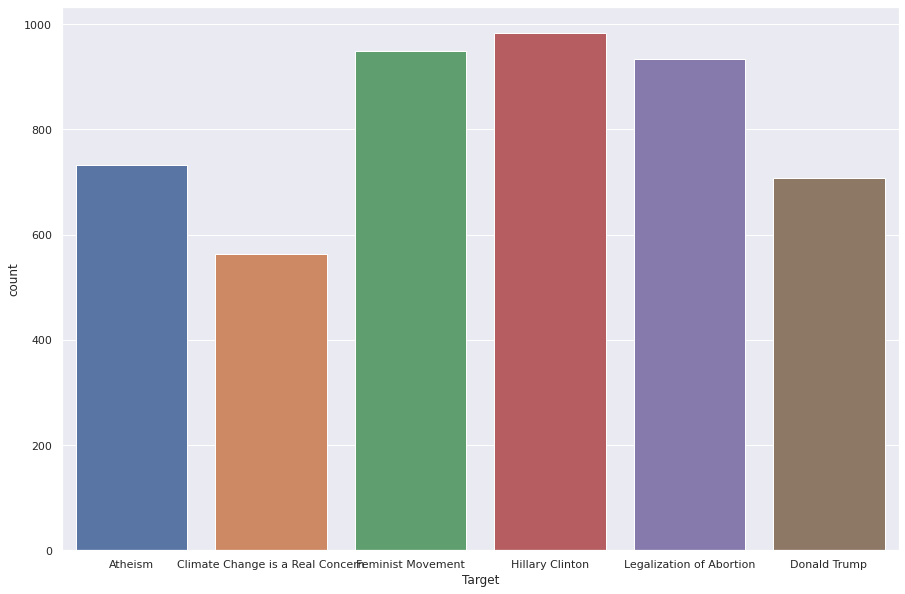

In [ ]:
sns.countplot(x='Target', data=final_df)

<AxesSubplot:xlabel='Stance', ylabel='count'>

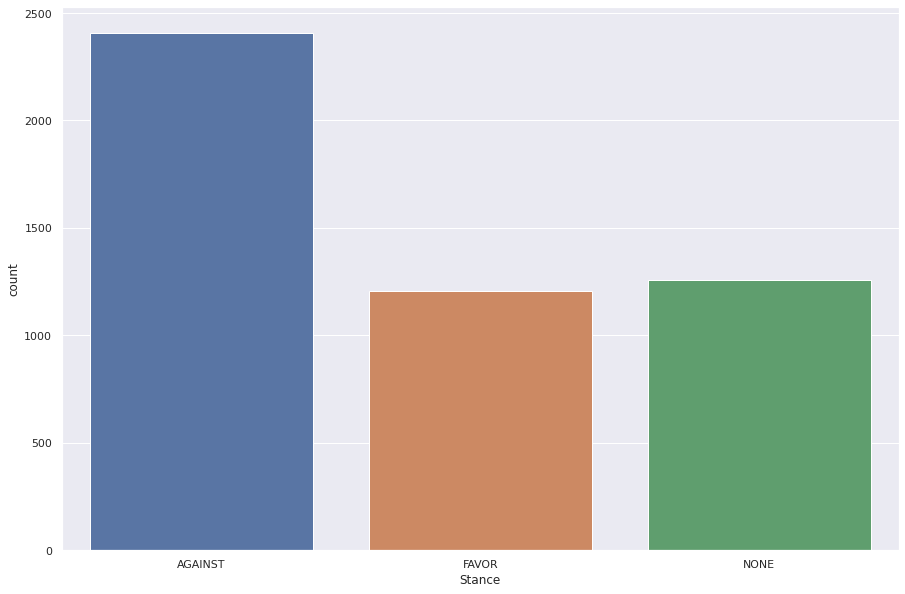

In [ ]:
sns.countplot(x='Stance', data=final_df)

<AxesSubplot:xlabel='Opinion towards', ylabel='count'>

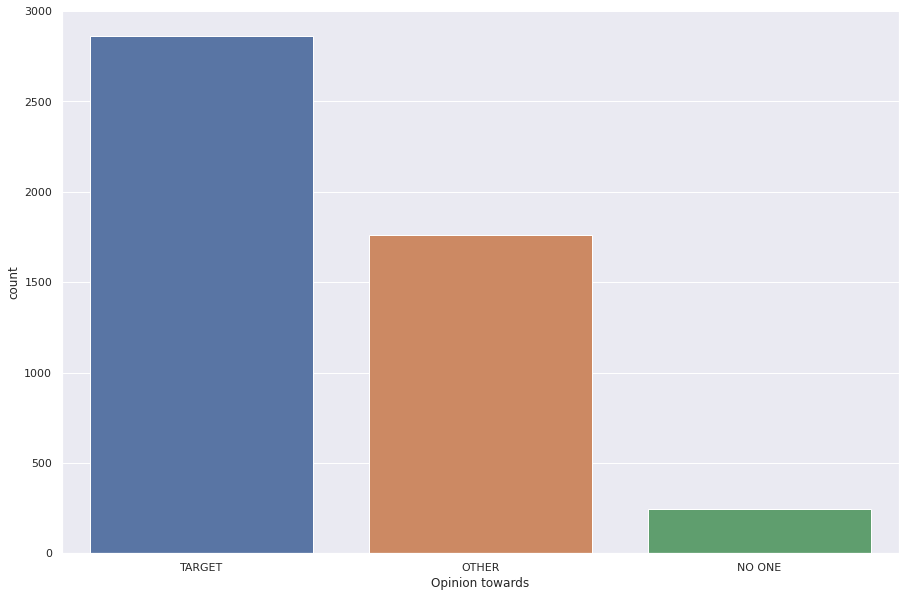

In [ ]:
sns.countplot(x='Opinion towards', data=final_df)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

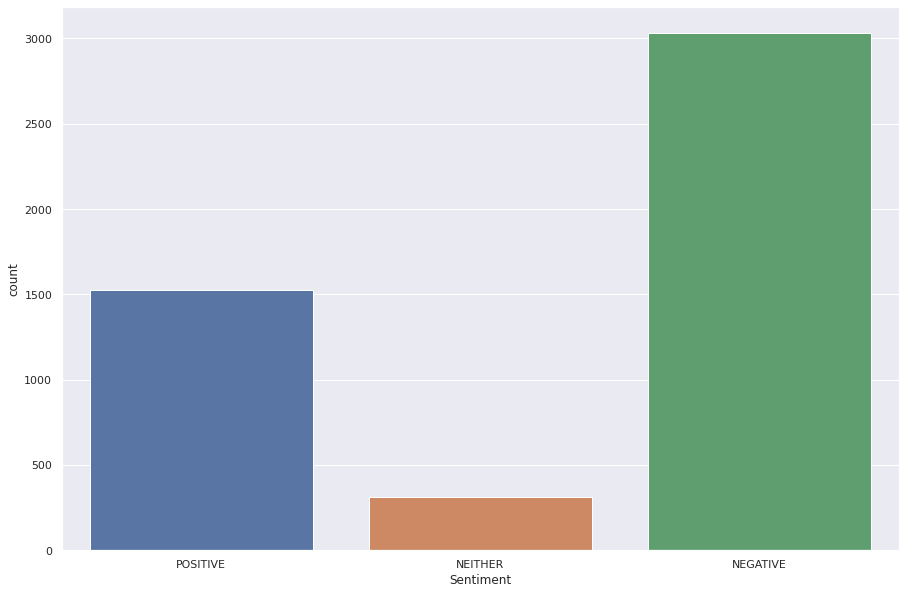

In [ ]:
sns.countplot(x='Sentiment', data=final_df)

## Data Preprocessing

In [ ]:
# # Data
# X, y = final_df[['Target', 'Tweet', 'Stance', 'Opinion towards']], final_df['Sentiment']
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

# # fit all models
# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, predictions=True)
# models, predictions = clf.fit(X_train, X_test, y_train, y_test)
# models

  0%|          | 0/29 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
  3%|▎         | 1/29 [00:00<00:12,  2.31it/s]/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
  7%|▋         | 2/29 [00:00<00:06,  3.90it/s]/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_e

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
